<Figure size 640x480 with 0 Axes>

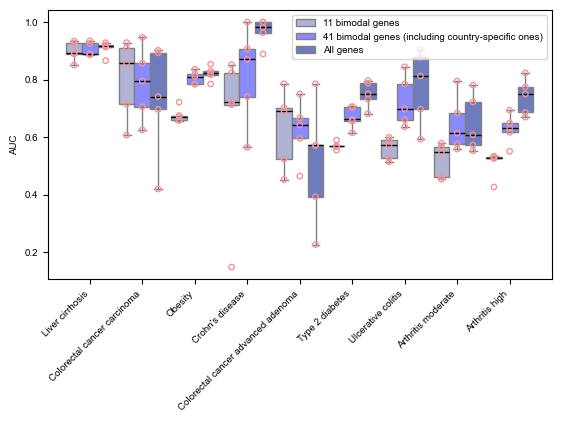

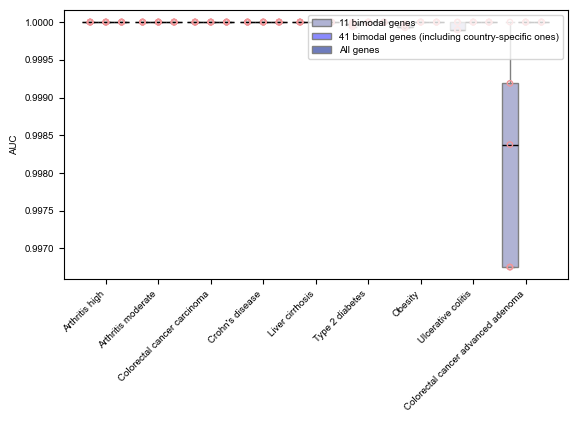

In [1]:
# 绘图
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
plt.figure()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
Disease_list=['Arthritis_High','Arthritis_Moderate','ColorectalCancer_AdvancedAdenoma','ColorectalCancer_Carcinoma','CrohnsDisease','LiverCirrhosis','Obesity','Type2Diabetes','UlcerativeColitis']
Disease_list2=['Arthritis high','Arthritis moderate','Colorectal cancer advanced adenoma','Colorectal cancer carcinoma','Crohn\'s disease','Liver cirrhosis','Obesity','Type 2 diabetes','Ulcerative colitis']
color_list = [mcolors.to_hex(plt.cm.tab20(i)) for i in range(20)]
file_list = ['(Test)','(Train)']
dir = 'optimum parameter in randomforest/'
for k in range(len(file_list)):
    list1=[]
    list2=[]
    list3=[]
    fig=plt.figure(figsize=(6.5,3.5))
    for i in range(len(Disease_list)):
        df=pd.read_csv(dir+file_list[k]+' optimum parameter of '+Disease_list[i]+' in random forest(11_genes).csv',index_col=0)
        roc_auc = df.mean(axis=1)
        max_index_index_roc_auc = roc_auc.idxmax()
        values = max(roc_auc) 
        error_bar = df.loc[max_index_index_roc_auc].std()
        section=df.loc[max_index_index_roc_auc].values.tolist()
        dict_merged=[Disease_list[i], values, error_bar, section]
        list1.append(dict_merged)
    sorted_list1= sorted(list1,key=lambda x: x[1], reverse=True)
    for i in range(len(Disease_list)):
        df=pd.read_csv(dir+file_list[k]+' optimum parameter of '+Disease_list[i]+' in random forest(41_genes).csv',index_col=0)
        roc_auc = df.mean(axis=1)
        max_index_index_roc_auc = roc_auc.idxmax()
        values = max(roc_auc) 
        error_bar = df.loc[max_index_index_roc_auc].std()
        section=df.loc[max_index_index_roc_auc].values.tolist()
        dict_merged=[Disease_list[i], values, error_bar, section]
        list2.append(dict_merged)
    for i in range(len(Disease_list)):
        df=pd.read_csv(dir+file_list[k]+' optimum parameter of '+Disease_list[i]+' in random forest(all_genes).csv',index_col=0)
        roc_auc = df.mean(axis=1)
        max_index_index_roc_auc = roc_auc.idxmax()
        values = max(roc_auc) 
        error_bar = df.loc[max_index_index_roc_auc].std()
        section=df.loc[max_index_index_roc_auc].values.tolist()
        dict_merged=[Disease_list[i], values, error_bar, section]
        list3.append(dict_merged)
    # Use zip and * unpacking operations
    Disease_list_new1,values_list1, error_bar_list1 ,section_list1= zip(*sorted_list1)
    Disease_list2_new1 = [Disease_list2[Disease_list.index(disease)] for disease in Disease_list_new1]    

    Disease_list_new2,values_list2, error_bar_list2 ,section_list2= zip(*list2)
    values_list2 = [values_list2[Disease_list.index(disease)] for disease in Disease_list_new1]
    error_bar_list2 = [error_bar_list2[Disease_list.index(disease)] for disease in Disease_list_new1]
    section_list2 = [section_list2[Disease_list.index(disease)] for disease in Disease_list_new1]

    Disease_list_new3,values_list3, error_bar_list3 ,section_list3= zip(*list3)
    values_list3 = [values_list3[Disease_list.index(disease)] for disease in Disease_list_new1]
    error_bar_list3 = [error_bar_list3[Disease_list.index(disease)] for disease in Disease_list_new1]
    section_list3 = [section_list3[Disease_list.index(disease)] for disease in Disease_list_new1]

    # Prepare data for the box plot
    data_11_genes = [np.array(section) for section in section_list1]
    data_41_genes = [np.array(section) for section in section_list2]
    data_all_genes = [np.array(section) for section in section_list3]

    positions_11 = np.arange(len(Disease_list_new1)) + 1 - 0.3
    positions_41 = np.arange(len(Disease_list_new1)) + 1
    positions_all = np.arange(len(Disease_list_new1)) + 1 + 0.3
    # Create an empty list to store all data
    all_data = []
    for i, disease in enumerate(Disease_list2_new1):
        all_data.append({
            'Disease': disease,
            '11 bimodal genes AUC values': data_11_genes[i],
            '41 bimodal genes AUC values': data_41_genes[i],
            'All genes AUC values': data_all_genes[i]
        })
    # Convert the data to a DataFrame
    df_all_data = pd.DataFrame(all_data)
    # Export to an Excel file
    df_all_data.to_excel('fig/'+file_list[k]+'AUC of roc curve of random forest  in difference disease(11 genes & 41 genes & all genes)(box plot).xlsx', index=False)

    # Plot box plots
    box_11 = plt.boxplot(data_11_genes, positions=positions_11, widths=0.3, patch_artist=True, boxprops=dict(facecolor='#B0B3D4',edgecolor='gray'),showfliers=False,medianprops= dict(color='black'),whiskerprops=dict(color='gray'),capprops=dict(color='gray'),zorder=1 )
    box_41 = plt.boxplot(data_41_genes, positions=positions_41, widths=0.3, patch_artist=True, boxprops=dict(facecolor='#8A8AFF',edgecolor='gray'),showfliers=False,medianprops= dict(color='black'),whiskerprops=dict(color='gray'),capprops=dict(color='gray'),zorder=1 )
    box_all = plt.boxplot(data_all_genes, positions=positions_all, widths=0.3, patch_artist=True, boxprops=dict(facecolor='#6E7CBD',edgecolor='gray'),showfliers=False,medianprops= dict(color='black'),whiskerprops=dict(color='gray'),capprops=dict(color='gray'),zorder=1 )
    # Define a function to plot scatter points and set zorder to 2
    def plot_all_points(data, positions, facecolor='none',edgecolor='#F19598', alpha=1.0, size=15, jitter=0.0):
        for i, pos in enumerate(positions):
            y = data[i]
            x = np.random.normal(pos, jitter, size=len(y))  # 添加随机抖动
            plt.scatter(x, y, facecolor=facecolor,edgecolor=edgecolor, alpha=alpha, s=size, zorder=2)
    # Plot all data points
    plot_all_points(data_11_genes, positions_11)
    plot_all_points(data_41_genes, positions_41)
    plot_all_points(data_all_genes, positions_all)
    # Manually create a legend
    legend_handles = [
        box_11["boxes"][0],
        box_41["boxes"][0],
        box_all["boxes"][0]
    ]
    legend_labels = ['11 bimodal genes', '41 bimodal genes (including country-specific ones)', 'All genes']
    plt.ylabel('AUC',fontsize=7)
    plt.xticks(np.arange(len(Disease_list_new1)) + 1, Disease_list2_new1, fontsize=7)
    plt.xticks(rotation=45, fontsize=7, ha='right')  
    plt.yticks(fontsize=7)
    plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=7)
    plt.savefig('fig/'+file_list[k]+'AUC of roc curve of random forest  in difference disease(11 genes & 41 genes & all genes)(box plot).pdf', bbox_inches='tight')